## Practice regression and linear model with neural network
using pytorch

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# pytorch version
import torch
import torch.nn as nn
import torch.optim as optim

# tensorflow version
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

# plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Dataset is an artificial house price set

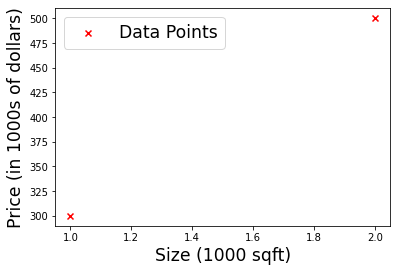

In [25]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

## Tensorflow

[]
tf.Tensor([[-1.2165983]], shape=(1, 1), dtype=float32)
w = [[-1.2165983]], b=[0.]
[array([[200.]], dtype=float32), array([100.], dtype=float32)]
tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


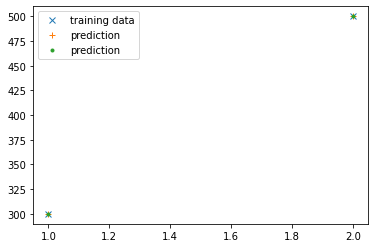

In [43]:
linear_layer=tf.keras.layers.Dense(units=1, activation='linear',)
print(linear_layer.get_weights()) # there is not weights yet, as the layer has not been called yet.

a1=linear_layer(X_train[0].reshape(1,1)) # calling the layer to initialize the weights
print(a1) # with one data point the weights are initialized to randomly

w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")
# a1=linear_layer(X_train) # calling the layer to initialize the weights
# print(a1)


# lets manually set the weights
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

ax = plt.plot(X_train, Y_train, label='training data', marker='x', linestyle='None')
ax = plt.plot(X_train, prediction_np, label='prediction', marker='+', linestyle='None')
ax = plt.plot(X_train, prediction_tf, label='prediction', marker='.', linestyle='None')
ax = plt.legend()


In [73]:
torch_linear_layer = nn.Linear(in_features=1, out_features=1, bias=True)

torch_linear_layer(torch.tensor(X_train[0].reshape(1,1))) # converting the numpy array to a tensor
print(torch_linear_layer.weight, torch_linear_layer.bias)
print("\n")
# lets manually set the weights
torch_linear_layer.weight.data = torch.tensor([[200.],[100.]],requires_grad=True)
print(torch_linear_layer.weight, torch_linear_layer.bias)

print("\n")
print("train: ",torch.tensor(X_train))

input = torch.randn(1, 2)
print("input:", input)

# prediction_pt = torch_linear_layer(torch.tensor(X_train))
prediction_pt = torch_linear_layer(input)
print("prediction: ",prediction_pt)


Parameter containing:
tensor([[-0.7364]], requires_grad=True) Parameter containing:
tensor([-0.2040], requires_grad=True)


Parameter containing:
tensor([[200.],
        [100.]], requires_grad=True) Parameter containing:
tensor([-0.2040], requires_grad=True)


train:  tensor([[1.],
        [2.]])
input: tensor([[-1.5006, -1.8840]])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 1x2)